
Q.1. (a). Let us consider x to be a random variable, where x ∈ [-10,10]. Generate 100 samples of x and plot the pdf of x for x~ N(0; 1) and x~ N(3; 2).
Comment on the difference in plot. If there is a difference in magnitude, comment why?



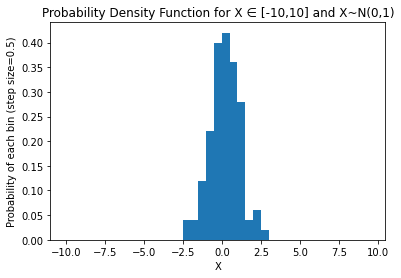

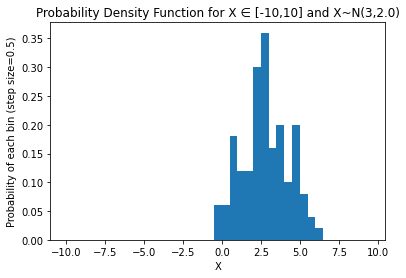

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plt_gaussian(mu,sigma,N):   #function for plotting pdfs
 
  samples=[]  #list for storing the values of random variable X
  for i in range(N):
    s = np.random.normal(mu, sigma) #generating the samples from a normal distribution
    
    if s>10 or s<-10:   # rejecting sample value if outside given range
      i=i-1
    else:
      samples.append(s) # adding to the samples list if within given range
     


  bins=np.arange(-10,10,0.5)  #creating bins with a step size of 0.5 for histogram plot
  plt.hist(samples,bins,density=True) #plotting the normalized samples count, i.e, the probability values obtained by dividing the sample count by total count(which is N=100)
  plt.xlabel('X')
  plt.ylabel('Probability of each bin (step size=0.5)')
  plt.title(f'Probability Density Function for X ∈ [-10,10] and X~N({mu},{np.round(sigma**2,0)})')
  plt.show()   



N=100        #number of samples

mu, sigma = 0, 1          # mean and standard deviation
plt_gaussian(mu,sigma,N)  #plotting pdf of N(0,1)

mu,sigma=3,math.sqrt(2)   # mean and standard deviation
plt_gaussian(mu,sigma,N)  #plotting pdf of N(2,3)


The first plot has a higher magnitude compared to the second one. 

The first plot for N(0,1) has a standard deviation of 1, while the second plot for N(3,2) has a standard deviation of sqrt(2). The peak value for a continuous Gaussian pdf occurs at its mean value and it is equal to 1/(sigma*sqrt(2*pi)). Since these plots have been made by sampling from such continuous Gaussian distribution funtions, they are also expected to follow that nature.

Therefore, the second plot, having a higher value of sigma, shows a smaller magnitude of probability at its mean value and other values as well. Also it is more spread out because of the higher standard deviation.

(b). Consider the two-dimensional normal distribution p(xjw) ~ N(u; E)
where u =
[
0;
0
]
and E =
[
1 0.6;
0.6 2
]
. Let x be a random vector defned by x =
[
x1
x2
]
, where xi ∈ [-10; 10]. Plot the surface plot and contour plot of the pdf.

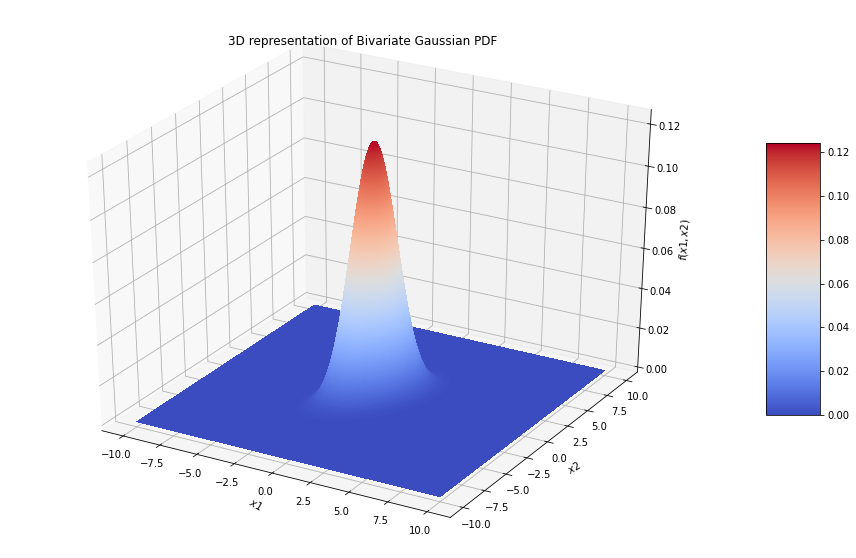

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'


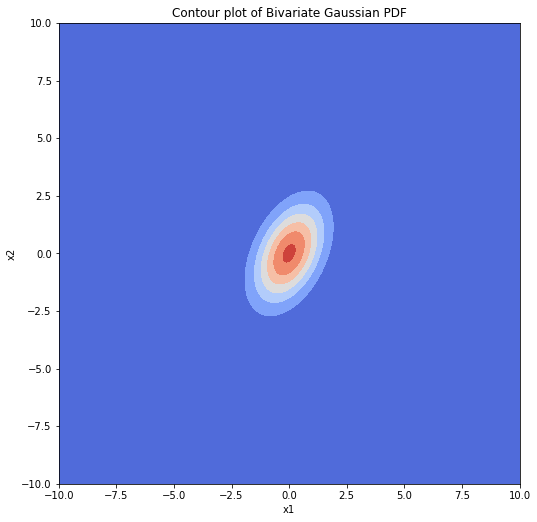

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


def multivariate_gaussian(pos, mu, Sigma):    # Returns the multivariate Gaussian distribution on array pos.
  
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)  #finding the determinant of Sigma
    Sigma_inv = np.linalg.inv(Sigma)    # finding the inverse of Sigma
    N = np.sqrt((2*np.pi)**n * Sigma_det) #the denominator in the expression of pdf

    # einsum is used to calculate (x-mu)T.Sigma^-1.(x-mu) in a vectorized way across all the input variables for higher computational efficiency.
    mat_pdt = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-mat_pdt / 2) / N


# The 2-dimensional distribution will be over variables X1 and X2
N = 1000
X1 = np.linspace(-10, 10, N)
X2 = np.linspace(-10, 10, N)
X1, X2 = np.meshgrid(X1, X2)

# Mean vector and covariance matrix
mu = np.array([0, 0])
Sigma = np.array([[ 1. , 0.6], [0.6,  2]])

# Concatenate X and Y into a single 3-dimensional array 'pos'
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1
pos[:, :, 1] = X2


# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(16,10)) 
ax = fig.gca(projection='3d') 
surf=ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, linewidth=0.08, antialiased=False,cmap=cm.coolwarm)
ax.set_xlabel('$x1$', rotation=-30)  # naming the axes
ax.set_ylabel('$x2$', rotation=30)
ax.set_zlabel('$f(x1,x2)$', rotation=90)

# To add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('3D representation of Bivariate Gaussian PDF ')  # title for the plot
plt.show()


fig = plt.figure(figsize=(8,8)) 
ax=fig.add_axes([0.1,0.1,0.8,0.8])
cset = ax.contourf(X1, X2, Z, zdir='z', offset=-0.15, cmap=cm.coolwarm)
ax.set_xlabel('x1')  # naming the axes
ax.set_ylabel('x2')
ax.set_title('Contour plot of Bivariate Gaussian PDF')  # title for the plot

plt.show()

Q.2. Classify the iris flower dataset using a Naive Bayes Classifer. Link to
download the dataset is here. The dataset consists of 3 classes and has 150 data
samples. Each data sample has 4 features and a class label. The details related
to the dataset can be found here.
Consider 70% of the data as training samples and the rest as testing samples.
Display the predicted labels and the true labels. Also, calculate the accuracy of
your prediction.

Note:
1. Arrange the samples according to class and calculate the prior prob-
ability of each class using a Gaussian distribution.
2. Don't arbitrarily choose 70% data for training. First arrange according to
each class and then randomly choose the training and the testing samples from
each class.
3. This is a supervised method. The testing labels should be used only to
compare with the predicted labels. Also, you can opt for the confusion matrix(optional) to present your prediction. In case you are not using confusion
matrix, show the predicted labels and true labels of each data sample using a
bar diagram.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn import datasets
from sklearn.metrics import confusion_matrix

#Returns the class for which the Gaussian Naive Bayes objective function has greatest value
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
   
    scores_list = []    # empty list declared  to store the probabilities p(yi | x) for all 3 classes (i = 1,2,3)
    classes = 3    
    for p in range(classes):    
    # calculating the probabilities p(yi | x) (ignoring the denominator p(x) which is just for normalization  since we are just going to choose the
    # class with the highest p(yi | x) )
      
      score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )            # score = p(x | yi)*p(yi) 
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )         # where p(x|yi)= product of all p(xj | yi) in Naive Bayes classifier
                  * norm.pdf(x = X[2], loc = mu_list[p][0][2], scale = std_list[p][0][2] )       # xj are the individual features in the feature vector x
                    * norm.pdf(x = X[3], loc = mu_list[p][0][3], scale = std_list[p][0][3] )     # here i = 1,2,3 (classes) and j= 1,2,3,4 (features)
                      * pi_list[p])
        
      scores_list.append(score)
             
    return np.argmax(scores_list) # selecting the class with highes p(y|x)



#     LOADING  the data set

iris = datasets.load_iris() # loading the iris dataset
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])  # converting it into a Pandas dataframe

df = data1[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)",'species']] # extracting the 4 feature values and the target label



#      SPLITTING into train and test set

# for each class, we are choosing randomly 35 out of the 50 (70 %) rows for training; the 150 rows are sorted according to labels  
randomlist1_train = random.sample(range(0, 49), 35)
randomlist2_train = random.sample(range(50, 99), 35)
randomlist3_train = random.sample(range(100, 149), 35)

df1_train=df.loc[randomlist1_train,:]
df2_train=df.loc[randomlist2_train,:]
df3_train=df.loc[randomlist3_train,:]

frames=[df1_train,df2_train,df3_train]
df_train=pd.concat(frames)        # concatenating into a single train set

# choosing the rest 15 out of 50 rows for testing the classifier
randomlist1_test=[x for x in list(range(50)) if x not in randomlist1_train]
randomlist2_test=[x for x in list(range(50,100)) if x not in randomlist2_train]
randomlist3_test=[x for x in list(range(100,150)) if x not in randomlist3_train]

df1_test=df.loc[randomlist1_test,:]
df2_test=df.loc[randomlist2_test,:]
df3_test=df.loc[randomlist3_test,:]

frames2=[df1_test,df2_test,df3_test]
df_test=pd.concat(frames2)         # concatenating into a single test set




#     ESTIMATING the parameters used for testing

# the mean and standard deviation of the individual features for each class is calculated (in total 3x4 = 12 values for each mean and std_dev)
mu_list = np.split(df_train.groupby('species').mean().values,[1,2,3,4])
std_list = np.split(df_train.groupby('species').std().values,[1,2,3,4], axis = 0)
pi_list = df.iloc[:,4].value_counts().values / len(df_train)    #apriori probabilities of each class (1/3 here for each class as there are 50x3=150 samples)



#     PREPARE  X and y test data
X_data = df_test.iloc[:,0:4]    # features are the first 4 columns and label is the last column
y_labels = df_test.iloc[:,4]



#     COMPUTING the predicted class for each row of the test set

y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy,aa,bb]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy,aa,bb in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1]),np.ravel(X_data.values[:,2]),np.ravel(X_data.values[:,3])) ] )

#   Printing predicted and true labels, accuracy and confusion matrix
print('Predicted labels:',end=' ')
print(y_pred)
print()
print('True labels:',end='      ')
y_true=[]
for i in range(45):
  y_true.append(int(y_labels.iloc[i]))

print(np.array(y_true))
print()
display('Accuracy:')
display(np.mean(y_pred == y_labels))
print()
print('Confusion Matrix:')
display(confusion_matrix(y_labels,y_pred))

Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2
 2 2 2 2 1 2 2 2]

True labels:      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]



'Accuracy:'

0.9333333333333333


Confusion Matrix:


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])